<a href="https://colab.research.google.com/github/danielarruda1000/geo_visao_comp/blob/main/Lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Função para calcular usando produto vetorial
## a) Ponto que é a interseção de duas retas
## b) Reta que passa por dois pontos

In [1]:
import numpy as np
import cv2

# a) Ponto que é a interseção de duas retas

In [3]:
# Em OpenCV

def reta_intesercao_cv(p1, p2):

  if type(p1) != tuple:
    p1 = (p1[0], p1[1], p1[2])
  if type(p2) != tuple:
    p2 = (p2[0], p2[1], p2[2])


  a1, a2, a3 = np.array(p1[0]), np.array(p1[1]), np.array(p1[2])
  b1, b2, b3 = np.array(p2[0]), np.array(p2[1]), np.array(p2[2])

  x = cv2.subtract(cv2.multiply(a2, b3), cv2.multiply(a3,b2))
  y = cv2.subtract(cv2.multiply(a3,b1), cv2.multiply(a1, b3))
  z = cv2.subtract(cv2.multiply(a1, b2), cv2.multiply(a2,b1))

  reta = np.array([x,y,z]).reshape(1,3)[0]

  return reta


In [14]:
# Em OpenCV
def ponto_intesercao_cv(r1, r2):

  reta = reta_intesercao_cv(r1,r2)
  #print(reta)

  a = float(reta[0])
  b = float(reta[1])
  c = float(reta[2])


  ponto_a = cv2.divide(a, c)[0][0]
  ponto_b = cv2.divide(b, c)[0][0]

  return round(ponto_a,1), round(ponto_b,1)

In [108]:
# Lado esquerdo
# Aresta superior
a = (387, 279, 1)
b = (482, 340, 1)
reta_ab = reta_intesercao_cv(a, b)
print('Reta A-B', reta_ab)

# Aresta inferior
d = (387, 397, 1)
e = (482, 493, 1)
reta_de = reta_intesercao_cv(d, e)
print('Reta D-E', reta_de)
ponto_fuga_esquerdo = ponto_intesercao_cv(reta_ab, reta_de)
print('Ponto de fuga esquerdo:', ponto_fuga_esquerdo,'\n')

# Lado direito
# Aresta superior
b = (482, 340, 1)
c = (590, 260, 1)
reta_bc = reta_intesercao_cv(b,c)
print('Reta B-C', reta_bc)

# Aresta inferior
e = (482, 493, 1)
f = (590, 368, 1)
reta_ef = reta_intesercao_cv(e,f)
print('Reta E-F', reta_ef)
ponto_fuga_direito = ponto_intesercao_cv(reta_bc, reta_ef)
print('Ponto de fuga direito:', ponto_fuga_direito)


Reta A-B [  -61    95 -2898]
Reta D-E [ -96   95 -563]
Ponto de fuga esquerdo: (np.float64(66.7), np.float64(73.3)) 

Reta B-C [    80    108 -75280]
Reta E-F [    125     108 -113494]
Ponto de fuga direito: (np.float64(849.2), np.float64(68.0))


In [109]:
pf_esq = (int(ponto_fuga_esquerdo[0]), int(ponto_fuga_esquerdo[1]), 1)
pf_dir = (int(ponto_fuga_direito[0]), int(ponto_fuga_direito[1]), 1)
print('Ponto de fuga esquerdo:', pf_esq, 'Ponto de fuga direito:',pf_dir)

Ponto de fuga esquerdo: (66, 73, 1) Ponto de fuga direito: (849, 68, 1)


In [110]:
reta_horizonte = reta_intesercao_cv(pf_esq, pf_dir)
print(reta_horizonte)
print(f'Formato de função: {reta_horizonte[0]}x + {reta_horizonte[1]}y + {reta_horizonte[2]} = 0')

[     5    783 -57489]
Formato de função: 5x + 783y + -57489 = 0


# Visualização

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
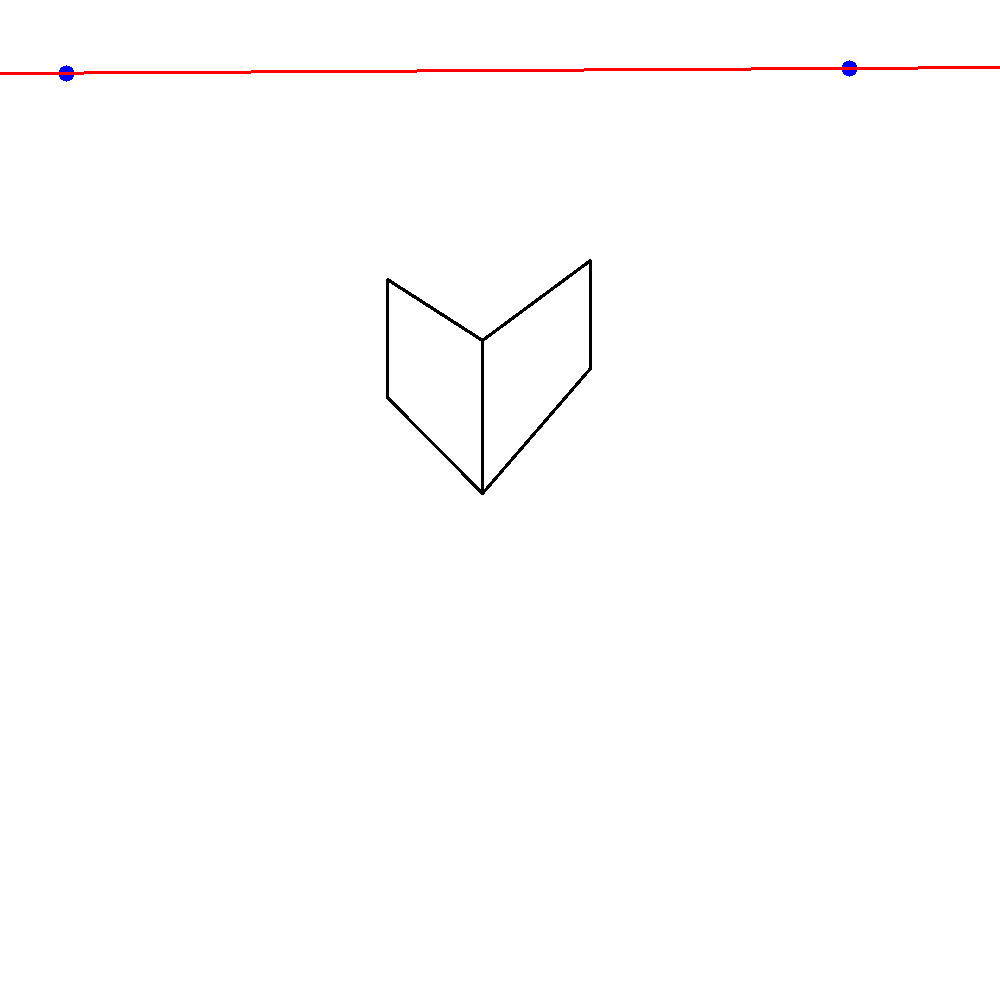

In [111]:
img = np.ones((1000, 1000, 3), dtype=np.uint8) * 255
arestas = [
  ((a[0], a[1]), (b[0], b[1])),
  ((d[0], d[1]), (e[0], e[1])),
  ((d[0], d[1]), (a[0], a[1])),
  ((b[0], b[1]), (e[0], e[1])),


  ((b[0], b[1]), (c[0], c[1])),
  ((f[0], f[1]), (e[0], e[1])),
  ((c[0], c[1]), (f[0], f[1])),
]
for p_1, p_2 in arestas:
    cv2.line(img, p_1, p_2, (0, 0, 0), 2)


cv2.circle(img, (int(pf_esq[0]), int(pf_esq[1])), 8, (0, 0, 255), -1)
cv2.circle(img, (int(pf_dir[0]), int(pf_dir[1])), 8, (0, 0, 255), -1)


x0, y0 = 0, int((-reta_horizonte[2] - reta_horizonte[0]*0) / reta_horizonte[1])
x1, y1 = img.shape[1], int((-reta_horizonte[2] - reta_horizonte[0]*img.shape[1]) / reta_horizonte[1])
cv2.line(img, (x0, y0), (x1, y1), (255, 0, 0), 2)